In [1]:
## 모형 불러오기
import trimesh
import numpy as np
model = trimesh.load('./obj/model.stl')

In [2]:
samples, face_indices = trimesh.sample.sample_surface_even(model, 300)

# 각 샘플링된 점에 대해 법선 벡터 추가
for i in range(len(samples)):
    sample = samples[i]  # 표면 위의 샘플링된 점
    face_index = face_indices[i]  # 해당 점이 속한 삼각형 면의 인덱스

    # 삼각형 면의 법선 벡터 가져오기
    normal = model.face_normals[face_index]

    # 샘플 점과 법선 벡터 결합
    results = np.append(sample, normal)

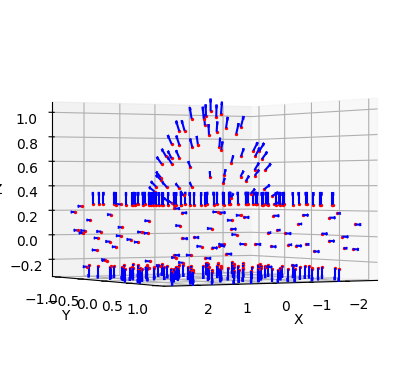

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 샘플링된 점과 그 점에서의 법선 벡터 시각화
for i in range(len(samples)):
    sample = samples[i]  # 샘플링된 점의 좌표
    face_index = face_indices[i]  # 해당 점이 속한 삼각형 면의 인덱스

    # 삼각형 면의 법선 벡터 가져오기
    normal = model.face_normals[face_index]

    # 샘플링된 점 그리기
    ax.scatter(sample[0], sample[1], sample[2], color='red', s=2)

    # 법선 벡터 그리기 (샘플링된 점에서 법선 방향으로 선 그리기)
    ax.quiver(sample[0], sample[1], sample[2],
              normal[0], normal[1], normal[2],
              length=0.1, color='blue')

# 축과 제목 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=60)

plt.show()